In [1]:
#Dependencies and Setup

%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from pathlib import Path




In [2]:
#Create a file path
data_set = Path("Resources/world_wide_self_harm_and_substance_deaths.csv")

#Read in the data
df = pd.read_csv(data_set)
df.head()


,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country
0,2017,Intentional self-harm,0,GBR,Female,0,743552.0,United Kingdom
1,2017,Intentional self-harm,0,GBR,Male,0,782850.0,United Kingdom
2,2017,Intentional self-harm,1,GBR,Female,0,768444.0,United Kingdom
3,2017,Intentional self-harm,1,GBR,Male,0,810126.0,United Kingdom
4,2017,Intentional self-harm,10-14,GBR,Female,16,3640314.0,United Kingdom


In [3]:
df1=df[~(df[df.columns[2:]]==0).any(axis = 1)]
df1

,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country
4,2017,Intentional self-harm,10-14,GBR,Female,16,3640314.0,United Kingdom
5,2017,Intentional self-harm,10-14,GBR,Male,16,3826458.0,United Kingdom
6,2017,Intentional self-harm,15-19,GBR,Female,104,3605202.0,United Kingdom
7,2017,Intentional self-harm,15-19,GBR,Male,208,3803268.0,United Kingdom
10,2017,Intentional self-harm,20-24,GBR,Female,136,4097544.0,United Kingdom
...,...,...,...,...,...,...,...,...
48621,2017,Mental and behavioural disorders due to psycho...,60-64,VIR,All,1,NaN,Virgin Islands (USA)
48622,2017,Mental and behavioural disorders due to psycho...,65-69,VIR,All,1,NaN,Virgin Islands (USA)
48623,2017,Mental and behavioural disorders due to psycho...,70-74,VIR,All,1,NaN,Virgin Islands (USA)
48625,2017,Mental and behavioural disorders due to psycho...,80-84,VIR,All,1,NaN,Virgin Islands (USA)


In [4]:
df2=df1[~(df1[df1.columns[2:]]=="Unknown").any(axis = 1)]
df2

,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country
4,2017,Intentional self-harm,10-14,GBR,Female,16,3640314.0,United Kingdom
5,2017,Intentional self-harm,10-14,GBR,Male,16,3826458.0,United Kingdom
6,2017,Intentional self-harm,15-19,GBR,Female,104,3605202.0,United Kingdom
7,2017,Intentional self-harm,15-19,GBR,Male,208,3803268.0,United Kingdom
10,2017,Intentional self-harm,20-24,GBR,Female,136,4097544.0,United Kingdom
...,...,...,...,...,...,...,...,...
48621,2017,Mental and behavioural disorders due to psycho...,60-64,VIR,All,1,NaN,Virgin Islands (USA)
48622,2017,Mental and behavioural disorders due to psycho...,65-69,VIR,All,1,NaN,Virgin Islands (USA)
48623,2017,Mental and behavioural disorders due to psycho...,70-74,VIR,All,1,NaN,Virgin Islands (USA)
48625,2017,Mental and behavioural disorders due to psycho...,80-84,VIR,All,1,NaN,Virgin Islands (USA)


In [5]:
df3=df2[~(df2[df2.columns[2:]]=="All").any(axis = 1)]
df3

,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country
4,2017,Intentional self-harm,10-14,GBR,Female,16,3.640314e+06,United Kingdom
5,2017,Intentional self-harm,10-14,GBR,Male,16,3.826458e+06,United Kingdom
6,2017,Intentional self-harm,15-19,GBR,Female,104,3.605202e+06,United Kingdom
7,2017,Intentional self-harm,15-19,GBR,Male,208,3.803268e+06,United Kingdom
10,2017,Intentional self-harm,20-24,GBR,Female,136,4.097544e+06,United Kingdom
...,...,...,...,...,...,...,...,...
31935,2021,Mental and behavioural disorders due to psycho...,80-84,AUS,Male,13,2.499620e+05,Australia
31936,2021,Mental and behavioural disorders due to psycho...,85-89,AUS,Male,7,1.357450e+05,Australia
31937,2021,Mental and behavioural disorders due to psycho...,90-94,AUS,Male,4,5.877900e+04,Australia
31938,2021,Mental and behavioural disorders due to psycho...,95+,AUS,Male,2,1.429300e+04,Australia


In [6]:
df4=df3[~(df3[df3.columns[2:3]]=="5-9").any(axis = 1)]
df4

,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country
4,2017,Intentional self-harm,10-14,GBR,Female,16,3.640314e+06,United Kingdom
5,2017,Intentional self-harm,10-14,GBR,Male,16,3.826458e+06,United Kingdom
6,2017,Intentional self-harm,15-19,GBR,Female,104,3.605202e+06,United Kingdom
7,2017,Intentional self-harm,15-19,GBR,Male,208,3.803268e+06,United Kingdom
10,2017,Intentional self-harm,20-24,GBR,Female,136,4.097544e+06,United Kingdom
...,...,...,...,...,...,...,...,...
31935,2021,Mental and behavioural disorders due to psycho...,80-84,AUS,Male,13,2.499620e+05,Australia
31936,2021,Mental and behavioural disorders due to psycho...,85-89,AUS,Male,7,1.357450e+05,Australia
31937,2021,Mental and behavioural disorders due to psycho...,90-94,AUS,Male,4,5.877900e+04,Australia
31938,2021,Mental and behavioural disorders due to psycho...,95+,AUS,Male,2,1.429300e+04,Australia


In [7]:
# Get all the data for the United States of America 
usa_df = df4.loc[df["Country"] == "United States of America",:]           
                 
usa_df

,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country
10451,2017,Intentional self-harm,10-14,USA,Female,169,NaN,United States of America
10452,2017,Intentional self-harm,15-19,USA,Female,553,NaN,United States of America
10454,2017,Intentional self-harm,20-24,USA,Female,672,NaN,United States of America
10455,2017,Intentional self-harm,25-29,USA,Female,766,NaN,United States of America
10457,2017,Intentional self-harm,30-34,USA,Female,832,NaN,United States of America
...,...,...,...,...,...,...,...,...
10858,2020,Mental and behavioural disorders due to psycho...,75-79,USA,Male,461,NaN,United States of America
10859,2020,Mental and behavioural disorders due to psycho...,80-84,USA,Male,199,NaN,United States of America
10860,2020,Mental and behavioural disorders due to psycho...,85-89,USA,Male,116,NaN,United States of America
10861,2020,Mental and behavioural disorders due to psycho...,90-94,USA,Male,43,NaN,United States of America


In [8]:
# Get all the data for the Intentional self-harm 
selfharm_df = usa_df.loc[usa_df["Cause"] == "Intentional self-harm", :] 
selfharm_df


,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country
10451,2017,Intentional self-harm,10-14,USA,Female,169,NaN,United States of America
10452,2017,Intentional self-harm,15-19,USA,Female,553,NaN,United States of America
10454,2017,Intentional self-harm,20-24,USA,Female,672,NaN,United States of America
10455,2017,Intentional self-harm,25-29,USA,Female,766,NaN,United States of America
10457,2017,Intentional self-harm,30-34,USA,Female,832,NaN,United States of America
...,...,...,...,...,...,...,...,...
10806,2020,Intentional self-harm,75-79,USA,Male,1492,NaN,United States of America
10807,2020,Intentional self-harm,80-84,USA,Male,1153,NaN,United States of America
10808,2020,Intentional self-harm,85-89,USA,Male,778,NaN,United States of America
10809,2020,Intentional self-harm,90-94,USA,Male,389,NaN,United States of America


In [9]:
selfharm_df.count()

Year                      144
Cause                     144
Age_Range                 144
ISO_Code                  144
Sex                       144
Deaths                    144
Age_and_Sex_Population      0
Country                   144
dtype: int64

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of USA for each year.

# Use groupby and summary statistical methods to calculate the following properties of each year: 
# mean, median, variance, standard deviation, and SEM of the country. 
mean = selfharm_df['Deaths'].groupby(selfharm_df['Year']).mean()
median = selfharm_df['Deaths'].groupby(selfharm_df['Year']).var()
var = selfharm_df['Deaths'].groupby(selfharm_df['Year']).var()
std = selfharm_df['Deaths'].groupby(selfharm_df['Year']).std()
sem = selfharm_df['Deaths'].groupby(selfharm_df['Year']).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stat = pd.DataFrame({"Self- Harm Deaths Mean":mean, 
                            "Self-Harm Deaths Median":median, 
                           "Self-Harm Variance":var, 
                           "Self-Harm Std. Dev.":std, 
                           "Self-Harm Std. Err.":sem})

summary_stat



,Self- Harm Deaths Mean,Self-Harm Deaths Median,Self-Harm Variance,Self-Harm Std. Dev.,Self-Harm Std. Err.
Year,,,,,
2017,1308.250000,1.268233e+06,1.268233e+06,1126.158359,187.693060
2018,1341.750000,1.328915e+06,1.328915e+06,1152.785605,192.130934
2019,1318.388889,1.293741e+06,1.293741e+06,1137.427505,189.571251
2020,1275.500000,1.230823e+06,1.230823e+06,1109.424574,184.904096


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  selfharm_df.groupby(['Year'])[['Deaths']].agg(['mean', 'median'])
summary_agg

Deaths       
             mean median
Year                    
2017  1308.250000  876.5
2018  1341.750000  880.0
2019  1318.388889  863.5
2020  1275.500000  805.0

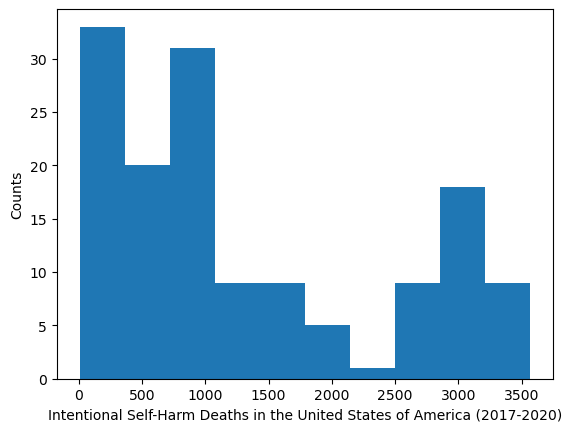

NormaltestResult(statistic=34.51392567404926, pvalue=3.20181522544649e-08)


<Figure size 640x480 with 0 Axes>

In [33]:
intentionaldeaths = selfharm_df['Deaths']
plt.hist(intentionaldeaths)
plt.xlabel('Intentional Self-Harm Deaths in the United States of America (2017-2020)')
plt.ylabel('Counts')
plt.show()
print(st.normaltest(intentionaldeaths.sample(144)))
plt.savefig("output_data/Fig3.png")

In [13]:
#**It fails the normality test because the Pvalue=pvalue= 3.201815225446364e-08 is  very small. 
#iven the complete dataset we can conclude that the data is not normally distributed.


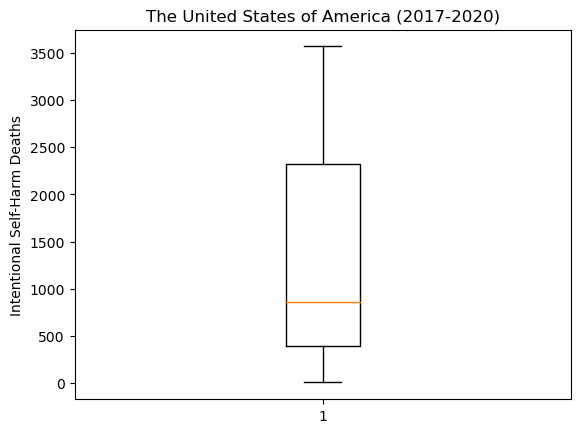

In [14]:
deaths = selfharm_df["Deaths"]
fig1, ax1 = plt.subplots()
ax1.set_title('The United States of America (2017-2020)')
ax1.set_ylabel('Intentional Self-Harm Deaths')
ax1.boxplot(deaths)
plt.show()

In [15]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = deaths.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of deaths is: {lowerq}")
print(f"The upper quartile of deaths is: {upperq}")
print(f"The interquartile range of deaths is: {iqr}")
print(f"The the median of deaths is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of deaths is: 390.75
The upper quartile of deaths is: 2318.25
The interquartile range of deaths is: 1927.5
The the median of deaths is: 863.5 
Values below -2500.5 could be outliers.
Values above 5209.5 could be outliers.


In [16]:
# Generate a scatter plot of intentional self-harm deaths vs age for year 2020
# Extruct columns of interest from original data frame:
year2020_df = selfharm_df.loc[selfharm_df["Year"] == 2020, :] 
year2020_df

,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country
10763,2020,Intentional self-harm,10-14,USA,Female,204,NaN,United States of America
10764,2020,Intentional self-harm,15-19,USA,Female,526,NaN,United States of America
10766,2020,Intentional self-harm,20-24,USA,Female,676,NaN,United States of America
10767,2020,Intentional self-harm,25-29,USA,Female,786,NaN,United States of America
10769,2020,Intentional self-harm,30-34,USA,Female,785,NaN,United States of America
10770,2020,Intentional self-harm,35-39,USA,Female,824,NaN,United States of America
10772,2020,Intentional self-harm,40-44,USA,Female,766,NaN,United States of America
10773,2020,Intentional self-harm,45-49,USA,Female,843,NaN,United States of America
10775,2020,Intentional self-harm,50-54,USA,Female,891,NaN,United States of America
10776,2020,Intentional self-harm,55-59,USA,Female,896,NaN,United States of America


In [17]:
# Calculate the final intentional self-harm deaths by year
# 2017, 2018, 2019, and 2020
year2017_df = selfharm_df.loc[selfharm_df["Year"] == 2017,:]
year2018_df = selfharm_df.loc[selfharm_df["Year"] == 2018, :]
year2019_df = selfharm_df.loc[selfharm_df["Year"] == 2019, :]
year2020_df = selfharm_df.loc[selfharm_df["Year"] == 2020, :]

year2017_df

,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country
10451,2017,Intentional self-harm,10-14,USA,Female,169,NaN,United States of America
10452,2017,Intentional self-harm,15-19,USA,Female,553,NaN,United States of America
10454,2017,Intentional self-harm,20-24,USA,Female,672,NaN,United States of America
10455,2017,Intentional self-harm,25-29,USA,Female,766,NaN,United States of America
10457,2017,Intentional self-harm,30-34,USA,Female,832,NaN,United States of America
10458,2017,Intentional self-harm,35-39,USA,Female,833,NaN,United States of America
10460,2017,Intentional self-harm,40-44,USA,Female,904,NaN,United States of America
10461,2017,Intentional self-harm,45-49,USA,Female,1108,NaN,United States of America
10463,2017,Intentional self-harm,50-54,USA,Female,1120,NaN,United States of America
10464,2017,Intentional self-harm,55-59,USA,Female,1091,NaN,United States of America


In [18]:
# Start by getting the last (greatest) deaths for year 2017
year2017_last = year2017_df.groupby('Year').max()['Deaths']
year2017_vol = pd.DataFrame(year2017_last)
# Merge this group df with the original DataFrame to get Age range
year2017_merge = pd.merge(year2017_vol, selfharm_df, on=("Year","Deaths"),how="left")

year2017_merge


,Year,Deaths,Cause,Age_Range,ISO_Code,Sex,Age_and_Sex_Population,Country
0,2017,3324,Intentional self-harm,55-59,USA,Male,NaN,United States of America


In [19]:
# Start by getting the last (greatest) deaths for year 2018
year2018_last = year2018_df.groupby('Year').max()['Deaths']
year2018_vol = pd.DataFrame(year2018_last)
# Merge this group df with the original DataFrame to get Age range
year2018_merge = pd.merge(year2018_vol, selfharm_df, on=("Year","Deaths"),how="left")

year2018_merge

,Year,Deaths,Cause,Age_Range,ISO_Code,Sex,Age_and_Sex_Population,Country
0,2018,3569,Intentional self-harm,55-59,USA,Male,NaN,United States of America


In [20]:
# Start by getting the last (greatest) deaths for year 2019
year2019_last = year2019_df.groupby('Year').max()['Deaths']
year2019_vol = pd.DataFrame(year2019_last)
# Merge this group df with the original DataFrame to get the age range
year2019_merge = pd.merge(year2019_vol, selfharm_df, on=("Year","Deaths"),how="left")

year2019_merge

,Year,Deaths,Cause,Age_Range,ISO_Code,Sex,Age_and_Sex_Population,Country
0,2019,3483,Intentional self-harm,55-59,USA,Male,NaN,United States of America


In [21]:
# Start by getting the last (greatest) deaths for year 2020
year2020_last = year2020_df.groupby('Year').max()['Deaths']
year2020_vol = pd.DataFrame(year2020_last)
# Merge this group df with the original DataFrame to get age range
year2020_merge = pd.merge(year2020_vol, selfharm_df, on=("Year","Deaths"),how="left")

year2020_merge

,Year,Deaths,Cause,Age_Range,ISO_Code,Sex,Age_and_Sex_Population,Country
0,2020,3463,Intentional self-harm,30-34,USA,Male,NaN,United States of America


In [22]:
# Create empty list to fill with year data (for plotting)
# add subset  
year_list = [2017, 2018, 2019, 2020]
years = selfharm_df[selfharm_df["Year"].isin(year_list)]
# Locate the rows which contain deaths on each year and get the numbers of deaths 
# Start by getting the last (greatest) deaths for each year
last_death = years.groupby(["Year", "Age_Range"]).agg(number_deaths=("Deaths", lambda x: x.iloc[-1]))

#Reshape dataframe
last_death = last_death.stack(level=0).unstack(level=0)
# Put years into a list for for loop (and later for plot labels)
yearnum = 0
for year in year_list:
    quartiles = last_death[year].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    iqr = round(upperq-lowerq,2)
# Determine outliers using upper and lower bounds
    lower_bound = round(lowerq - (1.5*iqr),)
    upper_bound = round(upperq + (1.5*iqr),2)

    if yearnum == 0:
           print(f" ")
    print(f"{year}'s potential outliers: {lower_bound}   {upper_bound}")
       
     
    yearnum +=1





 
2017's potential outliers: -1937   6076.12
2018's potential outliers: -1782   5974.5
2019's potential outliers: -1672   5886.25
2020's potential outliers: -1236   5361.5


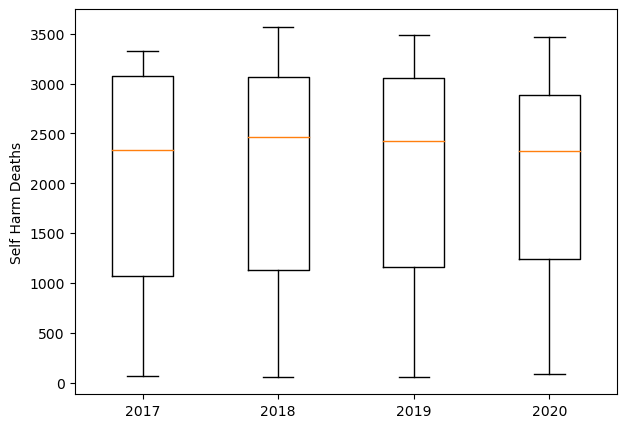

In [23]:
#Reshape dataframe
boxplot_list = []
for years in year_list:
    boxplot_list.append(list(last_death[years]))
    
fig, ax=plt.subplots(1, figsize=(7, 5))
bp=ax.boxplot(boxplot_list)
ax.set_xticks([1,2,3,4], year_list)
ax.set_ylabel("Self Harm Deaths")
for flier in bp['fliers']:
    flier.set(marker='o', markersize=10, markerfacecolor='crimson', alpha=1)

plt.show()  



In [24]:
Female = year2020_df.loc[year2020_df["Sex"] == 'Female', :] 
Male = year2020_df.loc[year2020_df["Sex"]=='Male', :]

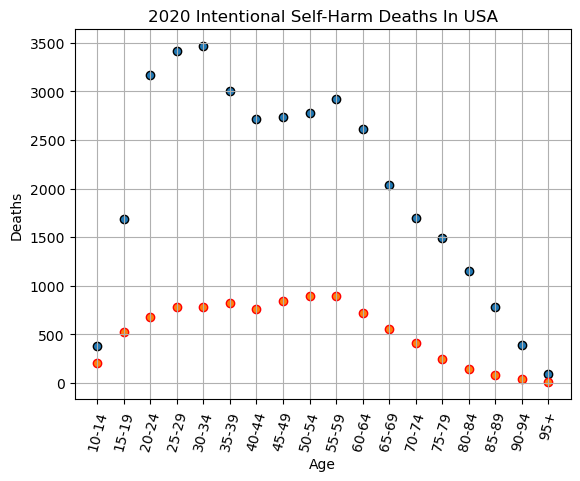

In [25]:
# Build scatter plot for deaths vs. age for 2020

plt.scatter(Male['Age_Range'],Male['Deaths'], marker='o', edgecolor='black', label="Male")

plt.scatter(Female['Age_Range'],Female['Deaths'], marker='o', edgecolor='red', label='Female')

#plt.legend(handles=[male, female], loc="best")
##plt.scatter(year2020_df['Age_Range'],year2020_df['Deaths'], marker='o', edgecolor='black')

# Incorporate the other graph properties

plt.xticks(rotation=75)
plt.xlabel('Age')
plt.ylabel('Deaths')
plt.title('2020 Intentional Self-Harm Deaths In USA')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")


plt.show()

In [26]:
# Define a function to create Linear Regression plots

def linear_reg(x_axis, y_axis,eq_loc):  
    correlation = st.pearsonr(x_axis,y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
    p_fit = p_slope * x_axis + p_int
    eq= f"y ={p_slope: .2f}x +{ p_int: .2f}"
       
    #Plot the line
    plt.scatter(x_axis, y_axis ,marker="o")
    plt.plot(x_axis,p_fit,"--", color='red')
    plt.annotate(eq, eq_loc, fontsize=12, color='red')
    print(f"The r-value between {x_axis.name} and {y_axis.name} is {round(correlation[0],2)}")

In [27]:
# Display 2020 data
year2020_df.head()

,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country
10763,2020,Intentional self-harm,10-14,USA,Female,204,NaN,United States of America
10764,2020,Intentional self-harm,15-19,USA,Female,526,NaN,United States of America
10766,2020,Intentional self-harm,20-24,USA,Female,676,NaN,United States of America
10767,2020,Intentional self-harm,25-29,USA,Female,786,NaN,United States of America
10769,2020,Intentional self-harm,30-34,USA,Female,785,NaN,United States of America


In [28]:
# get valuest from Age range
 
year2020_df["newagerange"]=year2020_df['Age_Range'].str[:2]   
  
year2020_df


C:\Users\adria\AppData\Local\Temp\ipykernel_19244\784015250.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year2020_df["newagerange"]=year2020_df['Age_Range'].str[:2]


,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country,newagerange
10763,2020,Intentional self-harm,10-14,USA,Female,204,NaN,United States of America,10
10764,2020,Intentional self-harm,15-19,USA,Female,526,NaN,United States of America,15
10766,2020,Intentional self-harm,20-24,USA,Female,676,NaN,United States of America,20
10767,2020,Intentional self-harm,25-29,USA,Female,786,NaN,United States of America,25
10769,2020,Intentional self-harm,30-34,USA,Female,785,NaN,United States of America,30
10770,2020,Intentional self-harm,35-39,USA,Female,824,NaN,United States of America,35
10772,2020,Intentional self-harm,40-44,USA,Female,766,NaN,United States of America,40
10773,2020,Intentional self-harm,45-49,USA,Female,843,NaN,United States of America,45
10775,2020,Intentional self-harm,50-54,USA,Female,891,NaN,United States of America,50
10776,2020,Intentional self-harm,55-59,USA,Female,896,NaN,United States of America,55


In [29]:
# Calculate the Pearson correlation coefficient between deaths age 
# for age and average deaths for the year 2020
#age=year2020_df.iloc[:,1]
#deaths=year2020_df.iloc[:,2]
#correlation = st.pearsonr(age,deaths)
#print(f"The correlation between age and the average deaths is {round(correlation[0],2)}")

In [30]:
# Convert relevant date columns to float

year2020_df = year2020_df.astype({"newagerange": "float"})
year2020_df.dtypes

Year                        int64
Cause                      object
Age_Range                  object
ISO_Code                   object
Sex                        object
Deaths                      int64
Age_and_Sex_Population    float64
Country                    object
newagerange               float64
dtype: object

The r-value between newagerange and Deaths is -0.36


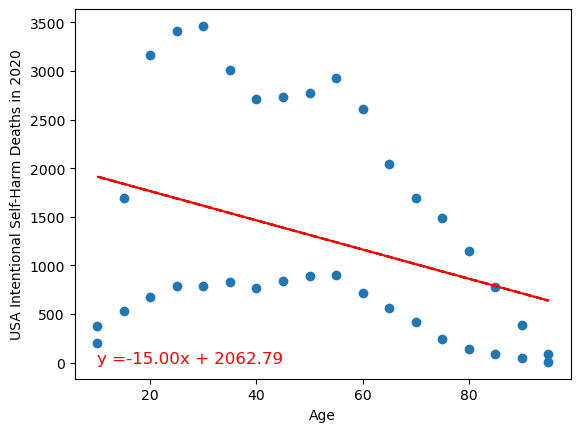

In [34]:
# Linear regression on year 2020
linear_reg(year2020_df['newagerange'], year2020_df['Deaths'],(10, -10))
plt.xlabel('Age')
plt.ylabel('USA Intentional Self-Harm Deaths in 2020')
# Save the figure
plt.savefig("output_data/Fig2.png")

In [32]:
#Discussion about the linear relationship:  In the year 2020 Intentinal harm-self deaths have a none or very weak strength of correlation 
#negative  coorelation -0.36  that is to  say the deaths level does not much relate to the Age range. 